In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
transactions_data = pd.read_csv('https://s3.wasabisys.com/iguazio/data/fraud-demo-mlrun-fs-docs/data.csv', parse_dates=['timestamp'])
user_events_data = pd.read_csv('https://s3.wasabisys.com/iguazio/data/fraud-demo-mlrun-fs-docs/events.csv',
                               index_col=0, quotechar="\'", parse_dates=['timestamp'])

In [ ]:
transactions_data.to_csv('transactions_data.csv')
user_events_data.to_csv('user_events_data.csv')

In [ ]:
user_events_data

,source,event,timestamp
0,C1974668487,details_change,2020-09-19 15:12:26.321576
1,C1973547259,login,2020-10-12 15:28:25.703053
2,C515668508,login,2020-09-16 10:10:50.498604
3,C1721541488,details_change,2020-10-02 13:59:25.553802
4,C394979408,password_change,2020-10-14 23:27:41.291391
...,...,...,...
82087,C755108533,details_change,2020-01-12 20:51:48.847317
82088,C220904895,details_change,2020-11-15 07:09:05.331048
82089,C954636025,password_change,2020-03-06 11:28:55.080025
82090,C883803148,login,2020-09-19 03:21:58.750017


In [ ]:
transactions_data.timestamp.nunique()

474673

In [ ]:
transactions_data.describe()

,step,zipcodeOri,zipMerchant,amount,fraud
count,474673.000000,474673.0,474673.0,474673.000000,474673.000000
mean,77.706415,28007.0,28007.0,38.104160,0.012434
std,41.988516,0.0,0.0,113.806729,0.110812
min,0.000000,28007.0,28007.0,0.000000,0.000000
25%,42.000000,28007.0,28007.0,13.740000,0.000000
50%,80.000000,28007.0,28007.0,26.890000,0.000000
75%,114.000000,28007.0,28007.0,42.530000,0.000000
max,147.000000,28007.0,28007.0,7665.560000,1.000000


In [ ]:
transactions_data.nunique()

step              148
age                 8
gender              4
zipcodeOri          1
zipMerchant         1
category           15
amount          21751
fraud               2
timestamp      474673
source           4112
target             50
device          12314
dtype: int64

In [ ]:
transactions_data.dtypes

step                    int64
age                    object
gender                 object
zipcodeOri              int64
zipMerchant             int64
category               object
amount                float64
fraud                   int64
timestamp      datetime64[ns]
source                 object
target                 object
device                 object
dtype: object

In [ ]:
transactions_data['month']= transactions_data.timestamp.dt.month

In [ ]:
transactions_data['hour']= transactions_data.timestamp.dt.hour

In [ ]:
fraud_data = transactions_data.loc[transactions_data['fraud'] == 1]
non_fraud_data = transactions_data.loc[transactions_data['fraud'] == 0]


In [ ]:
import matplotlib as mpl
# Set global font settings
font = {'family': 'Helvetica',  # You can change this to your desired font family
        'weight': 'normal',
        }

# Apply the font settings globally
mpl.rc('font', **font)

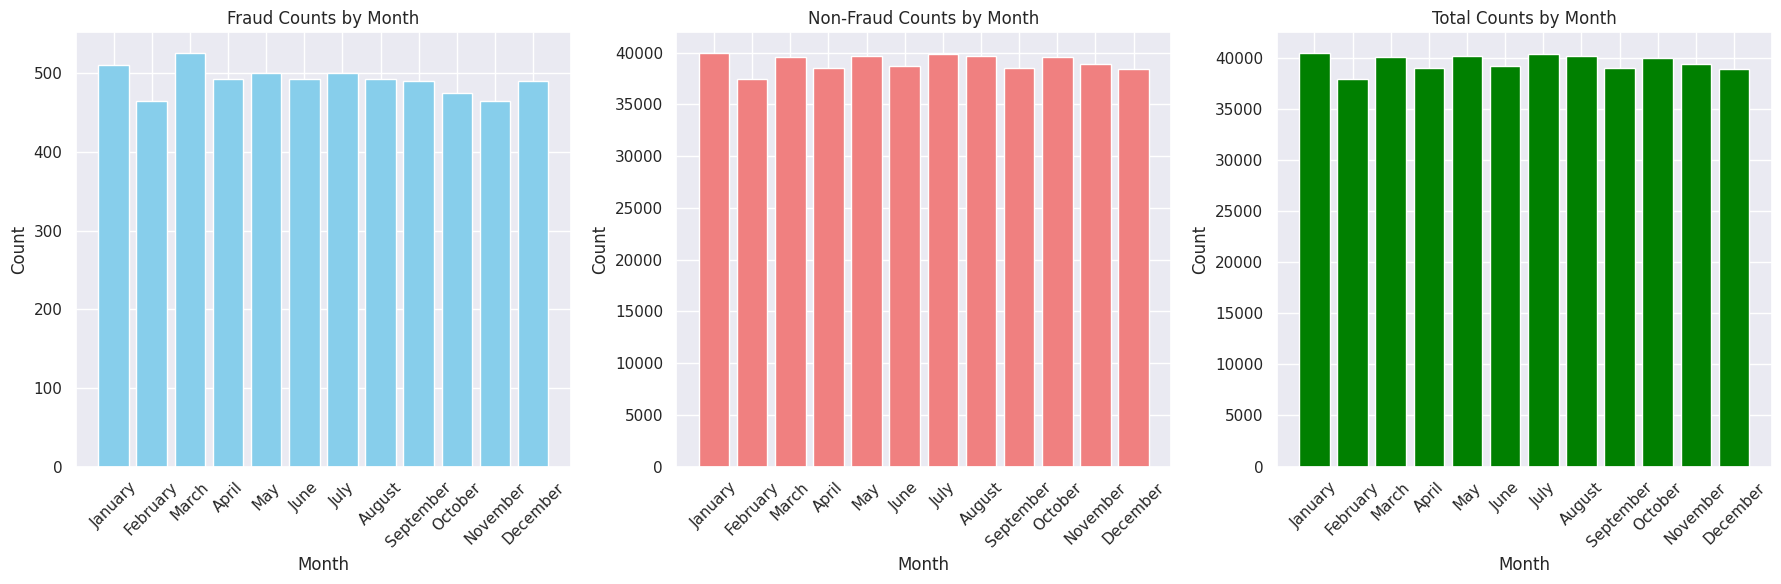

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fraud_counts = fraud_data.groupby('month')['fraud'].count()
non_fraud_counts = non_fraud_data.groupby('month')['fraud'].count()

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Fraud Counts
axs[0].bar(months, fraud_counts, color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].set_title('Fraud Counts by Month')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Non-Fraud Counts
axs[1].bar(months, non_fraud_counts, color='lightcoral')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
axs[1].set_title('Non-Fraud Counts by Month')
axs[1].tick_params(axis='x', rotation=45)

# Plot 3: Total Counts (Fraud + Non-Fraud)
total_counts = fraud_counts + non_fraud_counts
axs[2].bar(months, total_counts, color='green')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Count')
axs[2].set_title('Total Counts by Month')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()



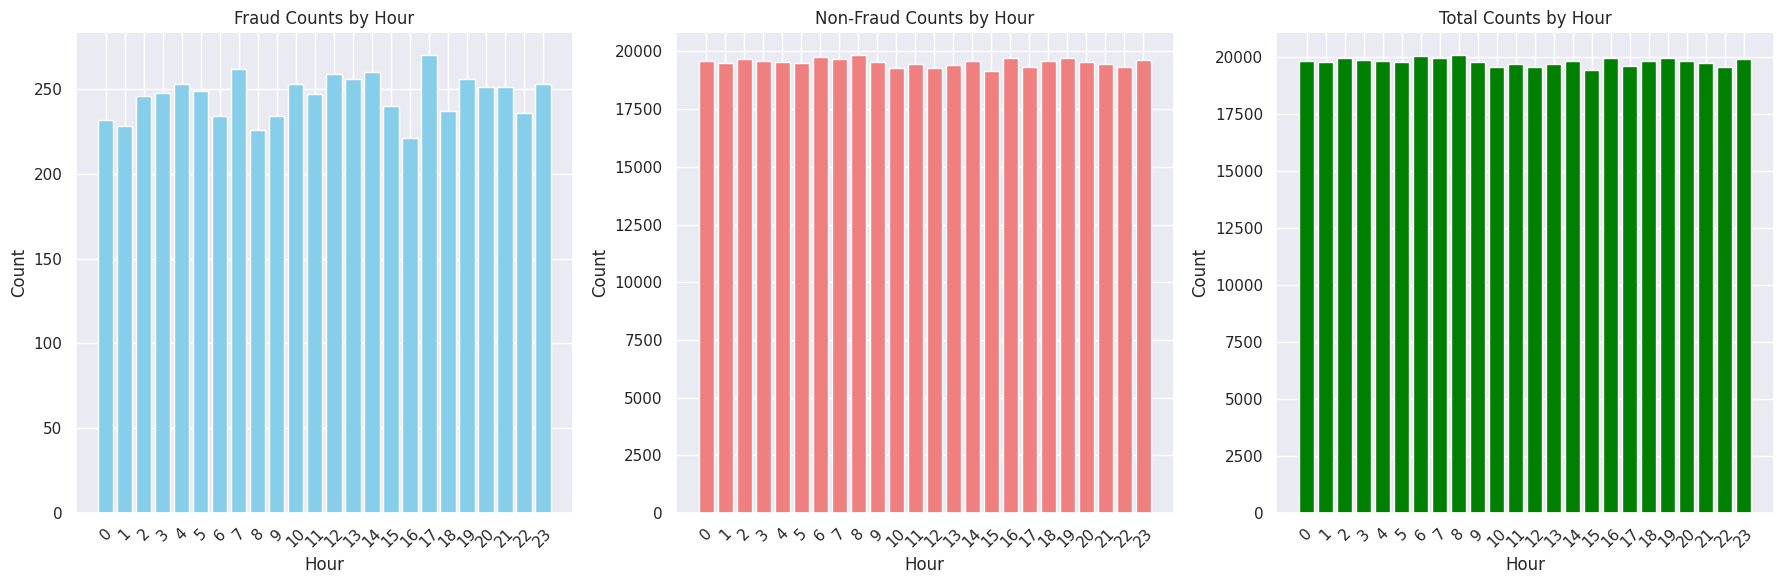

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Data (assuming you have 'hour' column in your data)
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]  # Replace with your actual data
fraud_counts = fraud_data.groupby('hour')['fraud'].count()  # Assuming you have an 'hour' column in fraud_data
non_fraud_counts = non_fraud_data.groupby('hour')['fraud'].count()  # Assuming you have an 'hour' column in non_fraud_data

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Fraud Counts by Hour
axs[0].bar(hours, fraud_counts, color='skyblue')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Count')
axs[0].set_title('Fraud Counts by Hour')
axs[0].set_xticks(hours)
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Non-Fraud Counts by Hour
axs[1].bar(hours, non_fraud_counts, color='lightcoral')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Count')
axs[1].set_title('Non-Fraud Counts by Hour')
axs[1].set_xticks(hours)
axs[1].tick_params(axis='x', rotation=45)

# Plot 3: Total Counts by Hour (Fraud + Non-Fraud)
total_counts = fraud_counts + non_fraud_counts
axs[2].bar(hours, total_counts, color='green')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('Count')
axs[2].set_title('Total Counts by Hour')
axs[2].set_xticks(hours)
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plots
plt.show()


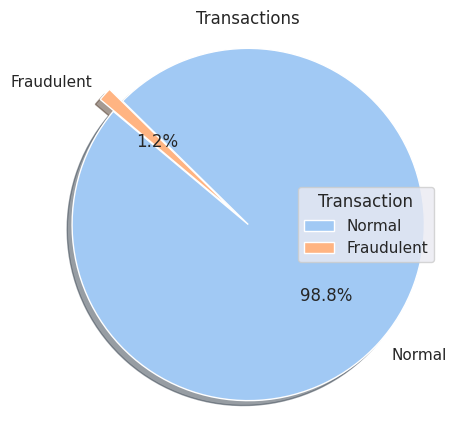

In [ ]:

# Get the count of 'fraud' and 'normal' transactions
value_counts = transactions_data['fraud'].value_counts()

# Define labels and colors
labels = ['Normal', 'Fraudulent']
colors = sns.color_palette('pastel')[0:2]

# Create a pie chart with some customizations
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0, 0.1))
plt.title('Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(title='Transaction', labels=labels, loc='best')

# Show the pie chart
plt.show()





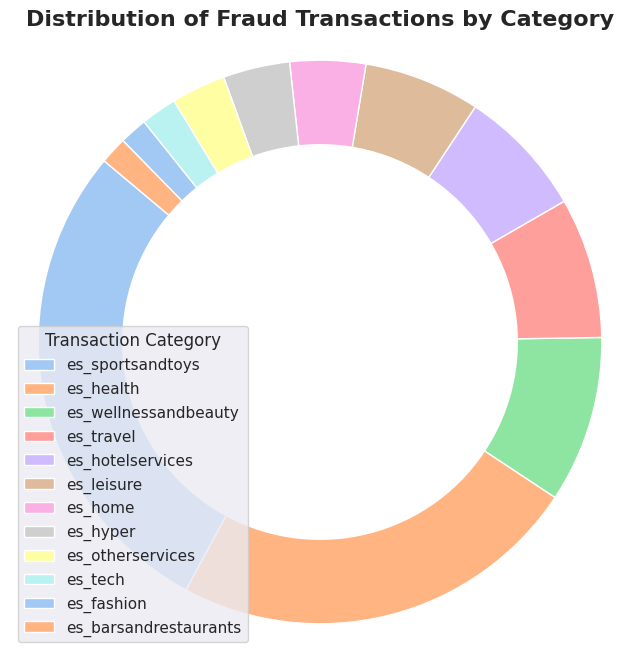

In [ ]:
# Sample data (replace with your actual data)
category_counts = fraud_data['category'].value_counts()

# Define labels, colors, and explode (to emphasize a slice)
labels = category_counts.index
colors = sns.color_palette('pastel')[0:len(labels)]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie chart with customizations
ax.pie(category_counts, colors=colors, startangle=140)

# Title and legend
ax.set_title('Distribution of Fraud Transactions by Category', fontsize=16, fontweight='bold')
ax.legend(title='Transaction Category', labels=labels, loc='best')

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Add a center circle to make it look like a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Show the pie chart
plt.show()



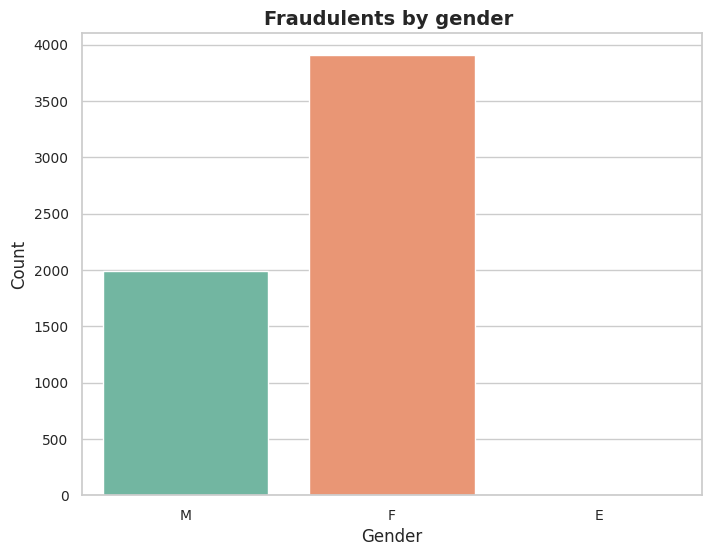

In [ ]:


# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Customize the countplot
sns.countplot(data=fraud_data, x="gender", palette="Set2")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add a title
plt.title("Fraudulents by gender ", fontsize=14, fontweight="bold")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


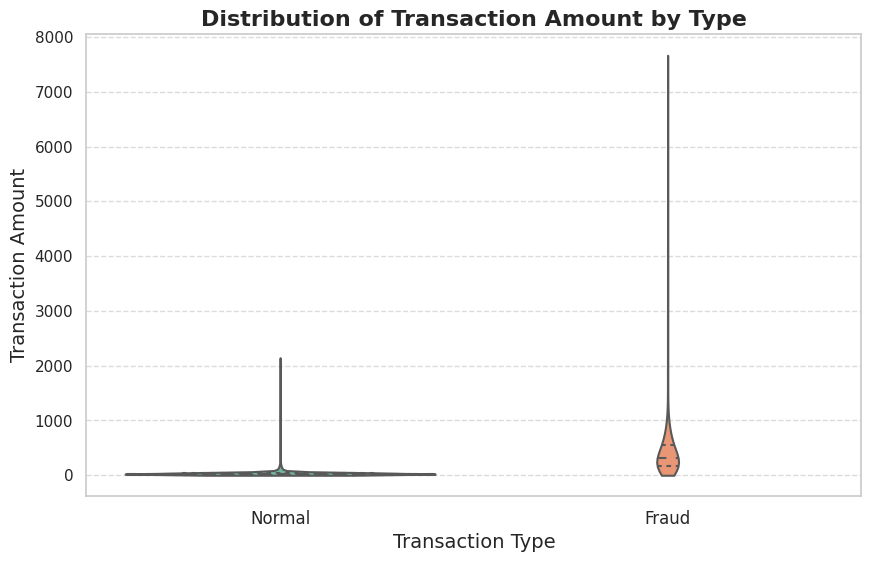

In [ ]:
# Set a professional style for the plot (you can adjust as needed)
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the violin plot with customizations
sns.violinplot(data=transactions_data, x="fraud", y="amount", palette="Set2", inner="quart", cut=0)

# Set labels and title
ax.set_xlabel("Transaction Type", fontsize=14)
ax.set_ylabel("Transaction Amount", fontsize=14)
ax.set_title("Distribution of Transaction Amount by Type", fontsize=16, fontweight="bold")

# Customize tick labels
ax.set_xticklabels(["Normal", "Fraud"], fontsize=12)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
category_columns = transactions_data.select_dtypes(include=['object']).columns


In [ ]:
category_columns

Index(['age', 'gender', 'category', 'source', 'target', 'device'], dtype='object')

In [ ]:
len(transactions_data[['source','target']].value_counts().values)

41850

In [ ]:
transactions_data.nunique()

step              148
age                 8
gender              4
zipcodeOri          1
zipMerchant         1
category           15
amount          21751
fraud               2
timestamp      474673
source           4112
target             50
device          12314
month              12
hour               24
dtype: int64

In [ ]:
df_cleaned = transactions_data.dropna()

In [ ]:
df_drop = df_cleaned.drop(columns = ['source','target','device','zipcodeOri','zipMerchant'])

In [ ]:
df_drop

,step,age,gender,category,amount,fraud,timestamp,month,hour
0,0,4,M,es_transportation,4.55,0,2020-08-30 03:31:42.286213,8,3
1,0,2,M,es_transportation,39.68,0,2020-01-09 11:59:46.997703,1,11
2,0,4,F,es_transportation,26.89,0,2020-10-18 00:07:23.191276,10,0
3,0,3,M,es_transportation,17.25,0,2020-10-23 06:43:55.782868,10,6
4,0,5,M,es_transportation,35.72,0,2020-06-16 09:23:34.842397,6,9
...,...,...,...,...,...,...,...,...,...
474668,147,2,F,es_transportation,45.93,0,2020-10-19 21:51:19.603393,10,21
474669,147,1,M,es_transportation,16.83,0,2020-01-31 06:11:57.758986,1,6
474670,147,3,M,es_transportation,35.71,0,2020-05-06 17:23:00.629833,5,17
474671,147,0,F,es_transportation,60.22,0,2020-01-27 04:59:36.089907,1,4


In [ ]:
category_columns = df_drop.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_drop, columns=category_columns)


In [ ]:
df_encoded

,step,amount,fraud,timestamp,month,hour,age_0,age_1,age_2,age_3,...,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty
0,0,4.55,0,2020-08-30 03:31:42.286213,8,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,39.68,0,2020-01-09 11:59:46.997703,1,11,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,26.89,0,2020-10-18 00:07:23.191276,10,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17.25,0,2020-10-23 06:43:55.782868,10,6,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,35.72,0,2020-06-16 09:23:34.842397,6,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474668,147,45.93,0,2020-10-19 21:51:19.603393,10,21,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
474669,147,16.83,0,2020-01-31 06:11:57.758986,1,6,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
474670,147,35.71,0,2020-05-06 17:23:00.629833,5,17,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
474671,147,60.22,0,2020-01-27 04:59:36.089907,1,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import numpy as np
# TODO - this is a transformation. We are applying it before we write to the FG.
# We should instead apply it as a transformation fn to the feature-view
# Map month to range (0, 11].
C = 2*np.pi/12
C_ = 2*np.pi/24
# Map month to the unit circle.
df_encoded["month_sin"] = np.sin(df_encoded['month']*C)
df_encoded["month_cos"] = np.cos(df_encoded['month']*C)
df_encoded.timestamp = df_encoded.timestamp.values.astype(np.int64) // 10 ** 6

In [ ]:
df_encoded['hour_sin']=np.sin(df_encoded['hour']*C)
df_encoded['hour_cos']=np.cos(df_encoded['hour']*C)


In [ ]:
df = df_encoded.drop(columns = ['month', 'hour'])


In [ ]:
df.drop(columns=['fraud'])

,step,amount,timestamp,age_0,age_1,age_2,age_3,age_4,age_5,age_6,...,category_es_otherservices,category_es_sportsandtoys,category_es_tech,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,month_sin,month_cos,hour_sin,hour_cos
0,0,4.55,1598758302286,0,0,0,0,1,0,0,...,0,0,0,1,0,0,-8.660254e-01,-5.000000e-01,1.000000e+00,6.123234e-17
1,0,39.68,1578571186997,0,0,1,0,0,0,0,...,0,0,0,1,0,0,5.000000e-01,8.660254e-01,-5.000000e-01,8.660254e-01
2,0,26.89,1602979643191,0,0,0,0,1,0,0,...,0,0,0,1,0,0,-8.660254e-01,5.000000e-01,0.000000e+00,1.000000e+00
3,0,17.25,1603435435782,0,0,0,1,0,0,0,...,0,0,0,1,0,0,-8.660254e-01,5.000000e-01,1.224647e-16,-1.000000e+00
4,0,35.72,1592299414842,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1.224647e-16,-1.000000e+00,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474668,147,45.93,1603144279603,0,0,1,0,0,0,0,...,0,0,0,1,0,0,-8.660254e-01,5.000000e-01,-1.000000e+00,-4.286264e-16
474669,147,16.83,1580451117758,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5.000000e-01,8.660254e-01,1.224647e-16,-1.000000e+00
474670,147,35.71,1588785780629,0,0,0,1,0,0,0,...,0,0,0,1,0,0,5.000000e-01,-8.660254e-01,5.000000e-01,-8.660254e-01
474671,147,60.22,1580101176089,1,0,0,0,0,0,0,...,0,0,0,1,0,0,5.000000e-01,8.660254e-01,8.660254e-01,-5.000000e-01


Trainning Model

In [ ]:
import xgboost as xgb
import sklearn.model_selection
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

# Load a sample dataset (e.g., the Iris dataset)
X, y = df.drop(columns=['fraud']), df['fraud']

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)

# Initialize and configure the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    n_estimators=100,             # Number of boosting rounds
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.1,            # Learning rate
    random_state=42               # Random seed for reproducibility
)

# Fit the XGBoost model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Calculate the F1 score
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.99
F1 Score: 0.75


In [ ]:
import xgboost as xgb
import sklearn.model_selection
import sklearn.metrics
from sklearn.utils import resample

# Load a sample dataset (e.g., the Iris dataset)
X, y = df.drop(columns=['fraud']), df['fraud']

# Separate the majority (non-fraud) and minority (fraud) classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Upsample the minority class to match the number of majority class samples
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
X_upsampled = pd.concat([majority_class, minority_upsampled])
y_upsampled = pd.Series([0] * len(majority_class) + [1] * len(minority_upsampled))

# Split the upsampled dataset into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_upsampled, y_upsampled, random_state=42)

# Initialize and configure the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    n_estimators=100,             # Number of boosting rounds
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.1,            # Learning rate
    random_state=42               # Random seed for reproducibility
)

# Fit the XGBoost model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the F1 score
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.96
F1 Score: 0.96


In [ ]:
# Calculate the F1 score
f1_score = sklearn.metrics.f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1_score:.2f}")

F1 Score: 0.75


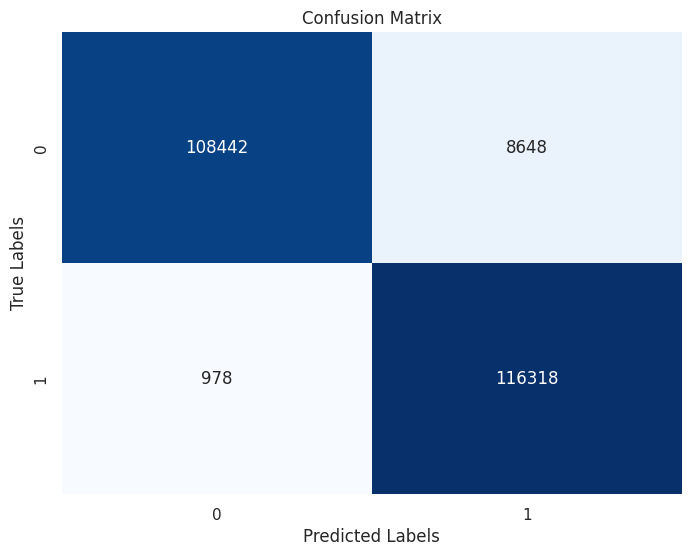

In [ ]:
# Create a confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

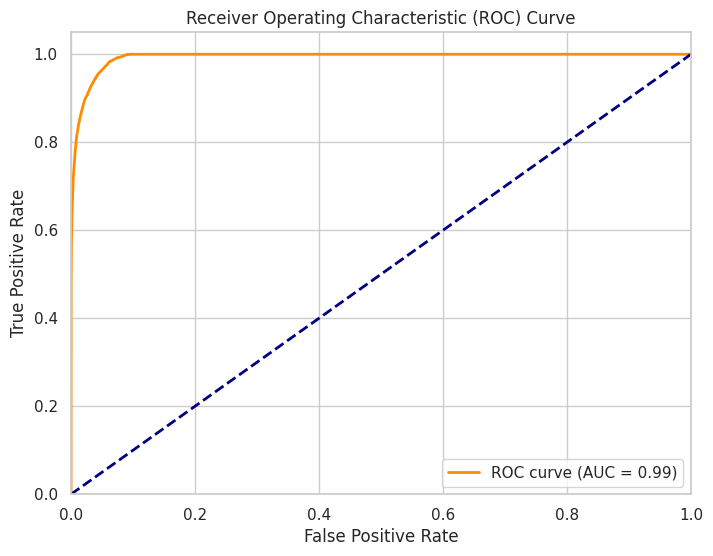

In [ ]:
# Predict probabilities of being in the positive class
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()